In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict

In [53]:
# This sets some nicer defaults for plotting.
# This must be run in a separate cell from importing matplotlib due to a bug.
params = {'legend.fontsize': 'small',
          'figure.figsize': (6.0, 6.0),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
mpl.rcParams.update(params)

In [54]:
#from google.colab import drive
#drive.mount('/content/drive')

# Data Cleaning

In [56]:
import pandas as pd
import numpy as np
df = pd.read_csv("CPR Dataframe Latest.csv")
#path = '/content/drive/MyDrive/Colab Notebooks/CPR Dataframe Latest.csv'
#df = pd.read_csv(path)

df = df.fillna(0)

df = df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)

pd.set_option('display.max_columns', None)
df

,CUSIP,CA,FL,IL,NY,TX,No,Yes,Cash-Out,N,Purchase,Investor,Principal,Second,Broker,Correspondent,Retail,Original Interest Rate,Loan Term,Loan Age,Loan-To-Value (LTV),Debt-To-Income (DTI),Borrower Credit Score,Number of Borrowers,Mortgage Insurance Percent,SMM,CPR,Month,PMM
0,31418D3X8,0.772761,0.085457,0.042700,0.019155,0.079927,0.866883,0.133117,0.321247,0.420729,0.258024,0.005188,0.975942,0.018870,0.465025,0.188188,0.346788,2.872365,360.0,0.973662,63.298615,36.416681,759.119720,1.475058,3.630751,0.003131,0.036937,October,3.0675
1,31418D3Y6,0.699621,0.088109,0.085910,0.036417,0.089943,0.840401,0.159599,0.477209,0.253330,0.269461,0.013565,0.962483,0.023952,0.195283,0.185995,0.618722,3.310758,360.0,1.093975,70.481364,37.470121,737.421850,1.504949,5.030062,0.005066,0.059132,October,3.0675
2,31418D4V1,0.411765,0.352941,0.000000,0.000000,0.235294,1.000000,0.000000,0.705882,0.058824,0.235294,0.352941,0.588235,0.058824,0.058824,0.294118,0.647059,4.875000,360.0,1.352941,70.882353,34.941176,693.882353,1.588235,2.176471,0.001423,0.016946,October,3.0675
3,31418D4A7,0.380952,0.119048,0.107143,0.047619,0.345238,0.952381,0.047619,0.690476,0.154762,0.154762,0.130952,0.833333,0.035714,0.083333,0.226190,0.690476,4.341964,360.0,1.130952,74.380952,38.785714,689.773810,1.440476,2.809524,0.017708,0.192979,October,3.0675
4,31418D3W0,0.813559,0.092010,0.012107,0.012107,0.070218,0.949153,0.050847,0.208232,0.690073,0.101695,0.000000,0.987893,0.012107,0.498789,0.278450,0.222760,2.370646,360.0,1.106538,56.617433,34.346247,768.302663,1.472155,1.612591,0.003351,0.039477,October,3.0675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,31418DLU4,0.563319,0.144105,0.074236,0.061135,0.157205,0.755459,0.244541,0.445415,0.113537,0.441048,0.135371,0.847162,0.017467,0.327511,0.366812,0.305677,4.872996,360.0,24.406114,75.960699,39.550218,700.563319,1.563319,5.135371,0.049407,0.455582,February,3.7625
621,31418DL34,0.525641,0.192308,0.089744,0.038462,0.153846,0.833333,0.166667,0.512821,0.076923,0.410256,0.243590,0.756410,0.000000,0.269231,0.294872,0.435897,5.335500,360.0,24.474359,78.384615,39.076923,689.025641,1.538462,5.474359,0.031646,0.320152,February,3.7625
622,31418DLV2,0.616487,0.141577,0.059140,0.023297,0.159498,0.793907,0.206093,0.428315,0.188172,0.383513,0.071685,0.915771,0.012545,0.191756,0.526882,0.281362,4.398351,360.0,24.378136,75.274194,40.082437,727.112903,1.541219,6.559140,0.042604,0.406943,February,3.7625
623,31418DLT7,0.704553,0.087893,0.062478,0.030357,0.114719,0.869749,0.130251,0.315567,0.377691,0.306742,0.017649,0.950935,0.031415,0.263325,0.323685,0.412990,3.867859,360.0,24.331098,70.256618,37.677374,750.155665,1.510413,4.993293,0.032487,0.327203,February,3.7625


In [57]:
df.set_index('CUSIP', inplace=True)

In [58]:
df['Month'].loc[df['Month']=='December']=12
df['Month'].loc[df['Month']=='November']=11
df['Month'].loc[df['Month']=='October']=10
df['Month'].loc[df['Month']=='January']=13
df['Month'].loc[df['Month']=='February']=14
df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,CA,FL,IL,NY,TX,No,Yes,Cash-Out,N,Purchase,Investor,Principal,Second,Broker,Correspondent,Retail,Original Interest Rate,Loan Term,Loan Age,Loan-To-Value (LTV),Debt-To-Income (DTI),Borrower Credit Score,Number of Borrowers,Mortgage Insurance Percent,SMM,CPR,Month,PMM
CUSIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31418D3X8,0.772761,0.085457,0.042700,0.019155,0.079927,0.866883,0.133117,0.321247,0.420729,0.258024,0.005188,0.975942,0.018870,0.465025,0.188188,0.346788,2.872365,360.0,0.973662,63.298615,36.416681,759.119720,1.475058,3.630751,0.003131,0.036937,10,3.0675
31418D3Y6,0.699621,0.088109,0.085910,0.036417,0.089943,0.840401,0.159599,0.477209,0.253330,0.269461,0.013565,0.962483,0.023952,0.195283,0.185995,0.618722,3.310758,360.0,1.093975,70.481364,37.470121,737.421850,1.504949,5.030062,0.005066,0.059132,10,3.0675
31418D4V1,0.411765,0.352941,0.000000,0.000000,0.235294,1.000000,0.000000,0.705882,0.058824,0.235294,0.352941,0.588235,0.058824,0.058824,0.294118,0.647059,4.875000,360.0,1.352941,70.882353,34.941176,693.882353,1.588235,2.176471,0.001423,0.016946,10,3.0675
31418D4A7,0.380952,0.119048,0.107143,0.047619,0.345238,0.952381,0.047619,0.690476,0.154762,0.154762,0.130952,0.833333,0.035714,0.083333,0.226190,0.690476,4.341964,360.0,1.130952,74.380952,38.785714,689.773810,1.440476,2.809524,0.017708,0.192979,10,3.0675
31418D3W0,0.813559,0.092010,0.012107,0.012107,0.070218,0.949153,0.050847,0.208232,0.690073,0.101695,0.000000,0.987893,0.012107,0.498789,0.278450,0.222760,2.370646,360.0,1.106538,56.617433,34.346247,768.302663,1.472155,1.612591,0.003351,0.039477,10,3.0675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31418DLU4,0.563319,0.144105,0.074236,0.061135,0.157205,0.755459,0.244541,0.445415,0.113537,0.441048,0.135371,0.847162,0.017467,0.327511,0.366812,0.305677,4.872996,360.0,24.406114,75.960699,39.550218,700.563319,1.563319,5.135371,0.049407,0.455582,14,3.7625
31418DL34,0.525641,0.192308,0.089744,0.038462,0.153846,0.833333,0.166667,0.512821,0.076923,0.410256,0.243590,0.756410,0.000000,0.269231,0.294872,0.435897,5.335500,360.0,24.474359,78.384615,39.076923,689.025641,1.538462,5.474359,0.031646,0.320152,14,3.7625
31418DLV2,0.616487,0.141577,0.059140,0.023297,0.159498,0.793907,0.206093,0.428315,0.188172,0.383513,0.071685,0.915771,0.012545,0.191756,0.526882,0.281362,4.398351,360.0,24.378136,75.274194,40.082437,727.112903,1.541219,6.559140,0.042604,0.406943,14,3.7625


In [59]:
df.sort_values(by=['CUSIP','Month'],inplace=True)
df

,CA,FL,IL,NY,TX,No,Yes,Cash-Out,N,Purchase,Investor,Principal,Second,Broker,Correspondent,Retail,Original Interest Rate,Loan Term,Loan Age,Loan-To-Value (LTV),Debt-To-Income (DTI),Borrower Credit Score,Number of Borrowers,Mortgage Insurance Percent,SMM,CPR,Month,PMM
CUSIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31418D2H4,0.529412,0.176471,0.176471,0.000000,0.117647,1.000000,0.000000,0.705882,0.058824,0.235294,0.235294,0.764706,0.0,0.058824,0.470588,0.470588,4.749412,360.0,4.058824,76.588235,35.588235,689.941176,1.470588,0.705882,0.046597,0.435949,10,3.0675
31418D2H4,0.562500,0.187500,0.125000,0.000000,0.125000,1.000000,0.000000,0.687500,0.062500,0.250000,0.250000,0.750000,0.0,0.062500,0.437500,0.500000,4.741563,360.0,5.062500,76.375000,34.937500,683.875000,1.500000,0.750000,0.181292,0.909313,11,3.0675
31418D2H4,0.461538,0.230769,0.153846,0.000000,0.153846,1.000000,0.000000,0.615385,0.076923,0.307692,0.307692,0.692308,0.0,0.076923,0.384615,0.538462,4.730769,360.0,6.076923,78.307692,35.461538,693.153846,1.384615,0.923077,0.060561,0.527479,12,3.0980
31418D2H4,0.416667,0.250000,0.166667,0.000000,0.166667,1.000000,0.000000,0.583333,0.083333,0.333333,0.333333,0.666667,0.0,0.083333,0.333333,0.583333,4.718750,360.0,7.000000,78.583333,35.000000,695.916667,1.333333,1.000000,0.267799,0.976256,13,3.4450
31418D2H4,0.333333,0.333333,0.111111,0.000000,0.222222,1.000000,0.000000,0.555556,0.000000,0.444444,0.444444,0.555556,0.0,0.111111,0.222222,0.666667,4.763889,360.0,7.888889,78.666667,35.777778,688.000000,1.222222,1.333333,0.105447,0.737415,14,3.7625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31418DZY1,0.512195,0.121951,0.048780,0.073171,0.243902,0.853659,0.146341,0.512195,0.292683,0.195122,0.146341,0.853659,0.0,0.073171,0.268293,0.658537,4.350000,360.0,3.853659,73.268293,38.097561,696.634146,1.512195,4.390244,0.015288,0.168795,10,3.0675
31418DZY1,0.525000,0.125000,0.050000,0.075000,0.225000,0.850000,0.150000,0.500000,0.300000,0.200000,0.150000,0.850000,0.0,0.075000,0.275000,0.650000,4.352500,360.0,4.875000,73.100000,37.950000,697.025000,1.500000,4.500000,0.051948,0.472784,11,3.0675
31418DZY1,0.512821,0.128205,0.051282,0.076923,0.230769,0.846154,0.153846,0.487179,0.307692,0.205128,0.153846,0.846154,0.0,0.076923,0.282051,0.641026,4.355128,360.0,5.871795,72.948718,37.641026,696.615385,1.512821,4.615385,0.065350,0.555583,12,3.0980


In [60]:
df['CPR'] = df['CPR'].shift(-1)
df['SMM'] = df['SMM'].shift(-1)
df

,CA,FL,IL,NY,TX,No,Yes,Cash-Out,N,Purchase,Investor,Principal,Second,Broker,Correspondent,Retail,Original Interest Rate,Loan Term,Loan Age,Loan-To-Value (LTV),Debt-To-Income (DTI),Borrower Credit Score,Number of Borrowers,Mortgage Insurance Percent,SMM,CPR,Month,PMM
CUSIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31418D2H4,0.529412,0.176471,0.176471,0.000000,0.117647,1.000000,0.000000,0.705882,0.058824,0.235294,0.235294,0.764706,0.0,0.058824,0.470588,0.470588,4.749412,360.0,4.058824,76.588235,35.588235,689.941176,1.470588,0.705882,0.181292,0.909313,10,3.0675
31418D2H4,0.562500,0.187500,0.125000,0.000000,0.125000,1.000000,0.000000,0.687500,0.062500,0.250000,0.250000,0.750000,0.0,0.062500,0.437500,0.500000,4.741563,360.0,5.062500,76.375000,34.937500,683.875000,1.500000,0.750000,0.060561,0.527479,11,3.0675
31418D2H4,0.461538,0.230769,0.153846,0.000000,0.153846,1.000000,0.000000,0.615385,0.076923,0.307692,0.307692,0.692308,0.0,0.076923,0.384615,0.538462,4.730769,360.0,6.076923,78.307692,35.461538,693.153846,1.384615,0.923077,0.267799,0.976256,12,3.0980
31418D2H4,0.416667,0.250000,0.166667,0.000000,0.166667,1.000000,0.000000,0.583333,0.083333,0.333333,0.333333,0.666667,0.0,0.083333,0.333333,0.583333,4.718750,360.0,7.000000,78.583333,35.000000,695.916667,1.333333,1.000000,0.105447,0.737415,13,3.4450
31418D2H4,0.333333,0.333333,0.111111,0.000000,0.222222,1.000000,0.000000,0.555556,0.000000,0.444444,0.444444,0.555556,0.0,0.111111,0.222222,0.666667,4.763889,360.0,7.888889,78.666667,35.777778,688.000000,1.222222,1.333333,0.001242,0.014799,14,3.7625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31418DZY1,0.512195,0.121951,0.048780,0.073171,0.243902,0.853659,0.146341,0.512195,0.292683,0.195122,0.146341,0.853659,0.0,0.073171,0.268293,0.658537,4.350000,360.0,3.853659,73.268293,38.097561,696.634146,1.512195,4.390244,0.051948,0.472784,10,3.0675
31418DZY1,0.525000,0.125000,0.050000,0.075000,0.225000,0.850000,0.150000,0.500000,0.300000,0.200000,0.150000,0.850000,0.0,0.075000,0.275000,0.650000,4.352500,360.0,4.875000,73.100000,37.950000,697.025000,1.500000,4.500000,0.065350,0.555583,11,3.0675
31418DZY1,0.512821,0.128205,0.051282,0.076923,0.230769,0.846154,0.153846,0.487179,0.307692,0.205128,0.153846,0.846154,0.0,0.076923,0.282051,0.641026,4.355128,360.0,5.871795,72.948718,37.641026,696.615385,1.512821,4.615385,0.068685,0.574248,12,3.0980


In [61]:
df_tt = df[df['Month']<13]
df_tt

,CA,FL,IL,NY,TX,No,Yes,Cash-Out,N,Purchase,Investor,Principal,Second,Broker,Correspondent,Retail,Original Interest Rate,Loan Term,Loan Age,Loan-To-Value (LTV),Debt-To-Income (DTI),Borrower Credit Score,Number of Borrowers,Mortgage Insurance Percent,SMM,CPR,Month,PMM
CUSIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31418D2H4,0.529412,0.176471,0.176471,0.000000,0.117647,1.000000,0.000000,0.705882,0.058824,0.235294,0.235294,0.764706,0.000000,0.058824,0.470588,0.470588,4.749412,360.0,4.058824,76.588235,35.588235,689.941176,1.470588,0.705882,0.181292,0.909313,10,3.0675
31418D2H4,0.562500,0.187500,0.125000,0.000000,0.125000,1.000000,0.000000,0.687500,0.062500,0.250000,0.250000,0.750000,0.000000,0.062500,0.437500,0.500000,4.741563,360.0,5.062500,76.375000,34.937500,683.875000,1.500000,0.750000,0.060561,0.527479,11,3.0675
31418D2H4,0.461538,0.230769,0.153846,0.000000,0.153846,1.000000,0.000000,0.615385,0.076923,0.307692,0.307692,0.692308,0.000000,0.076923,0.384615,0.538462,4.730769,360.0,6.076923,78.307692,35.461538,693.153846,1.384615,0.923077,0.267799,0.976256,12,3.0980
31418D2K7,0.745803,0.050360,0.055156,0.052758,0.095923,0.940048,0.059952,0.179856,0.683453,0.136691,0.009592,0.964029,0.026379,0.273381,0.299760,0.426859,2.476367,360.0,3.417266,58.613909,34.235012,770.333333,1.498801,2.119904,0.003005,0.035469,10,3.0675
31418D2K7,0.745803,0.050360,0.055156,0.052758,0.095923,0.940048,0.059952,0.179856,0.683453,0.136691,0.009592,0.964029,0.026379,0.273381,0.299760,0.426859,2.476367,360.0,4.417266,58.613909,34.235012,770.333333,1.498801,2.091127,0.003640,0.042820,11,3.0675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31418DZX3,0.661017,0.083205,0.081664,0.021572,0.152542,0.869029,0.130971,0.591680,0.157165,0.251156,0.063174,0.921418,0.015408,0.097072,0.420647,0.482280,3.869744,360.0,4.987673,75.318952,38.050847,705.463790,1.526965,4.685670,0.032417,0.326621,11,3.0675
31418DZX3,0.658228,0.082278,0.083861,0.022152,0.153481,0.868671,0.131329,0.588608,0.159810,0.251582,0.064873,0.919304,0.015823,0.098101,0.416139,0.485759,3.868068,360.0,5.985759,75.267405,38.007911,705.520570,1.525316,4.669304,0.039563,0.383937,12,3.0980
31418DZY1,0.512195,0.121951,0.048780,0.073171,0.243902,0.853659,0.146341,0.512195,0.292683,0.195122,0.146341,0.853659,0.000000,0.073171,0.268293,0.658537,4.350000,360.0,3.853659,73.268293,38.097561,696.634146,1.512195,4.390244,0.051948,0.472784,10,3.0675


In [62]:
df_vali=df[df['Month']==13]
df_vali

,CA,FL,IL,NY,TX,No,Yes,Cash-Out,N,Purchase,Investor,Principal,Second,Broker,Correspondent,Retail,Original Interest Rate,Loan Term,Loan Age,Loan-To-Value (LTV),Debt-To-Income (DTI),Borrower Credit Score,Number of Borrowers,Mortgage Insurance Percent,SMM,CPR,Month,PMM
CUSIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31418D2H4,0.416667,0.250000,0.166667,0.000000,0.166667,1.000000,0.000000,0.583333,0.083333,0.333333,0.333333,0.666667,0.000000,0.083333,0.333333,0.583333,4.718750,360.0,7.000000,78.583333,35.000000,695.916667,1.333333,1.000000,0.105447,0.737415,13,3.445
31418D2K7,0.747596,0.050481,0.055288,0.052885,0.093750,0.939904,0.060096,0.180288,0.685096,0.134615,0.009615,0.966346,0.024038,0.274038,0.300481,0.425481,2.476010,360.0,6.415865,58.651442,34.278846,770.247596,1.497596,2.096154,0.000921,0.010997,13,3.445
31418D2L5,0.730932,0.103537,0.055679,0.031786,0.078066,0.850326,0.149674,0.261678,0.446940,0.291383,0.009543,0.970438,0.020019,0.447012,0.164096,0.388893,2.890602,360.0,5.903638,63.985650,35.745856,763.391045,1.483748,3.930258,0.006270,0.072704,13,3.445
31418D2M3,0.614318,0.139387,0.084425,0.008529,0.153343,0.793160,0.206840,0.374914,0.260855,0.364232,0.016540,0.961751,0.021709,0.258098,0.217350,0.524552,3.308563,360.0,5.949087,72.913853,37.182374,737.660579,1.506116,6.990955,0.011856,0.133355,13,3.445
31418D2N1,0.519856,0.131769,0.102888,0.036101,0.209386,0.913357,0.086643,0.657040,0.185921,0.157040,0.057762,0.931408,0.010830,0.046931,0.332130,0.620939,3.880859,360.0,6.124549,73.527076,37.646209,721.859206,1.496390,3.301444,0.034937,0.347366,13,3.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31418DZU9,0.791111,0.045556,0.061111,0.026667,0.075556,0.963333,0.036667,0.198889,0.724444,0.076667,0.004444,0.981111,0.014444,0.141111,0.384444,0.474444,2.437330,360.0,7.296667,55.536667,33.631111,771.120000,1.530000,1.121111,0.004414,0.051704,13,3.445
31418DZV7,0.835468,0.038897,0.067290,0.019381,0.038965,0.886630,0.113370,0.268347,0.522125,0.209528,0.007725,0.968422,0.023853,0.398184,0.192654,0.409162,2.854612,360.0,7.045470,62.179576,35.578370,764.639967,1.520770,3.267331,0.004996,0.058333,13,3.445
31418DZW5,0.758195,0.075842,0.085591,0.009442,0.070930,0.832271,0.167729,0.368465,0.322484,0.309050,0.024334,0.956629,0.019037,0.279189,0.237200,0.483611,3.280022,360.0,6.868350,69.642128,36.882168,750.803101,1.512551,5.158440,0.012451,0.139590,13,3.445


In [63]:
#df_validation = df[df['Month']== 'February']
#df_tt = df[df['Month']!= 'February']

In [64]:
#df_tt

In [65]:
#df_validation

In [66]:
#fig=plt.figure(figsize=(12,8))
#sns.heatmap(df.corr(),robust=True,annot=True,cmap='plasma')

# Handy Functions

In [67]:
def summarize_dataframe(df):
    """Summarize a dataframe, and report missing values."""
    missing_values = pd.DataFrame({'Variable Name': df.columns,
                                   'Data Type': df.dtypes,
                                   'Missing Values': df.isnull().sum(),
                                   'Unique Values': [df[name].nunique() for name in df.columns]}
                                 ).set_index('Variable Name')
    with pd.option_context("display.max_rows", 1000):
        display(pd.concat([missing_values, df.describe(include='all', datetime_is_numeric=True).transpose()], axis=1).fillna(""))

summarize_dataframe(df)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CA,float64,0,483,625.0,,,,0.619134,0.203482,0.0,0.5,0.648649,0.786096,1.0
FL,float64,0,479,625.0,,,,0.104851,0.080901,0.0,0.048503,0.085829,0.138527,0.5
IL,float64,0,469,625.0,,,,0.083245,0.071707,0.0,0.05618,0.074074,0.090909,1.0
NY,float64,0,457,625.0,,,,0.050934,0.084063,0.0,0.014221,0.029412,0.061209,1.0
TX,float64,0,470,625.0,,,,0.141836,0.109743,0.0,0.054832,0.117647,0.208791,0.666667
No,float64,0,466,625.0,,,,0.878523,0.08137,0.607143,0.842105,0.891791,0.92429,1.0
Yes,float64,0,466,625.0,,,,0.121477,0.08137,0.0,0.07571,0.108209,0.157895,0.392857
Cash-Out,float64,0,482,625.0,,,,0.414801,0.194661,0.0,0.255501,0.428571,0.552279,1.0
N,float64,0,471,625.0,,,,0.315176,0.226064,0.0,0.13881,0.269231,0.501567,0.769231
Purchase,float64,0,484,625.0,,,,0.270022,0.158554,0.0,0.16685,0.235294,0.333333,1.0


In [68]:
def accuracy(y_true, y_pred):
    """A smaller RMSE is better"""
    from sklearn import metrics
    RMSE = mean_squared_error(y_true, y_pred)**(1/2)
    MSE = mean_squared_error(y_true, y_pred)
    RSQUARE = metrics.r2_score(y_true, y_pred)
    acc_df = pd.DataFrame(data = {"RMSE": [RMSE],
                                  "MSE": [MSE],
                                  "R SQUARE": [RSQUARE]})
    display(acc_df.style.hide_index())

In [69]:
def getCM(testX, testY, model, modelName):
    '''get confusion matrix, TPR, FPR, etc.'''
    predY = model.predict(testX)
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(testY)):
        if testY[i] == 1 and predY[i] == 1:
            TP += 1
        elif testY[i] == 1 and predY[i] == 0:
            FN += 1
        elif testY[i] == 0 and predY[i] == 1:
            FP += 1
        else:
            TN += 1
    diyCM = [['predY\\testY', '\t', 1, '\t', 0], ['\t', 1, '\t', TP, '\t', FP],
             ['\t', 0, '\t', FN, '\t', TN]]
    for i in diyCM:
        for j in i:
            print(j, end='')
        print('\n')
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    Fmeasure = 2 * TP / (2 * TP + FP + FN)
    accuracy = sum(list(map(lambda x, y: x == y and 1 or 0, predY, testY))) / len(testY)
    print('Accuracy = ', accuracy)
    print('TPR = ', TPR, '\t', 'FPR = ', FPR)
    print('precision = ', precision, '\t', 'recall = ', recall)
    print('F-measure = ', Fmeasure)
    
    #draw ROC
    proba = model.predict_proba(testX)
    scores = np.array([x[1] for x in proba])
    y = np.array(testY)
    fpr, tpr, thresholds = roc_curve(y, scores, pos_label = 1)
    print('AUC=', auc(fpr, tpr))
    '''
    plt.plot(fpr, tpr, label = modelName)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    '''
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label = modelName)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(modelName + ' ROC curve', fontsize = 15)
    plt.legend(loc = 'best')
    plt.show()

# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_tt, test_size = 0.3)

x_train = df_tt.drop(columns = ['Month','SMM','CPR'],axis=1)
y_train = df_tt['SMM']
x_test = df_vali.drop(columns = ['Month','SMM','CPR'],axis=1)
y_test = df_vali['SMM']


print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print('\n')
print(f'x_test.shape  = {x_test.shape}')
print(f'y_test.shape  = {y_test.shape}')

x_train.shape = (375, 25)
y_train.shape = (375,)


x_test.shape  = (125, 25)
y_test.shape  = (125,)


In [71]:
#x_train

In [72]:
#y_train

# Lasso

In [73]:
lasso_model = Lasso(alpha = 1, max_iter=1000000)
lasso_model.fit(x_train, y_train)

Lasso(alpha=1, max_iter=1000000)

In [79]:
print("Training R-Square",lasso_model.score(x_train,y_train))
print("Testing R-Square",lasso_model.score(x_test,y_test))

Training R-Square 0.0
Testing R-Square -0.06321355904101966


In [80]:
y_pred = lasso_model.predict(x_test)
df_lassomodel = pd.DataFrame({'Actual SMM': y_test, 'Predicted SMM': y_pred})
df_lassomodel

,Actual SMM,Predicted SMM
CUSIP,,
31418D2H4,0.105447,0.035658
31418D2K7,0.000921,0.035658
31418D2L5,0.006270,0.035658
31418D2M3,0.011856,0.035658
31418D2N1,0.034937,0.035658
...,...,...
31418DZU9,0.004414,0.035658
31418DZV7,0.004996,0.035658
31418DZW5,0.012451,0.035658


In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02480409572597395
Mean Squared Error: 0.0010555724985225913
Root Mean Squared Error: 0.03248957522841121


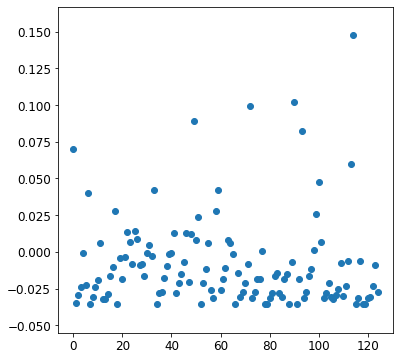

In [82]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(y_test)),(y_test-y_pred))
plt.show()

#Method not Helpful

# Ridge

In [83]:
ridge_model = Ridge(alpha = 1, max_iter=500000)
ridge_model.fit(x_train, y_train)

Ridge(alpha=1, max_iter=500000)

In [84]:
print("Training R-Square",ridge_model.score(x_train,y_train))
print("Testing R-Square",ridge_model.score(x_test,y_test))

Training R-Square 0.4171371533449183
Testing R-Square -0.0734672451748315


In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02480409572597395
Mean Squared Error: 0.0010555724985225913
Root Mean Squared Error: 0.03248957522841121


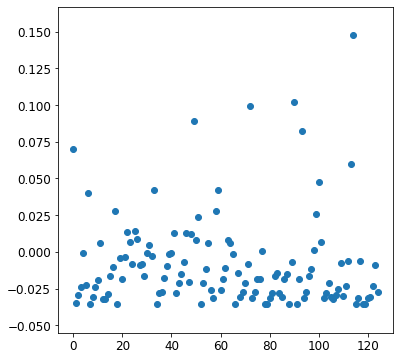

In [86]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(y_test)),(y_test-y_pred))
plt.show()

In [87]:
df_cpr_vali = pd.DataFrame({'Actual_CPR': y_test, 'Predicted_CPR':y_pred })
df_cpr_vali['Actual_CPR']=1-(1-df_cpr_vali['Actual_CPR'])**12
df_cpr_vali['Predicted_CPR']=1-(1-df_cpr_vali['Predicted_CPR'])**12

df_cpr_vali

,Actual_CPR,Predicted_CPR
CUSIP,,
31418D2H4,0.737415,0.353192
31418D2K7,0.010997,0.353192
31418D2L5,0.072704,0.353192
31418D2M3,0.133355,0.353192
31418D2N1,0.347366,0.353192
...,...,...
31418DZU9,0.051704,0.353192
31418DZV7,0.058333,0.353192
31418DZW5,0.139590,0.353192


In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR']))
print('Mean Squared Error:', metrics.mean_squared_error(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR'])))

Mean Absolute Error: 0.2013884444330501
Mean Squared Error: 0.05562205791061276
Root Mean Squared Error: 0.23584329100191245


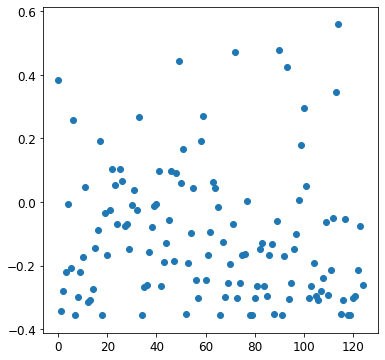

In [89]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(df_cpr_vali['Actual_CPR'])),(df_cpr_vali['Actual_CPR']-df_cpr_vali['Predicted_CPR']))
plt.show()

In [90]:
df_Feb= df[df['Month']==14]
x_Feb=df_Feb.drop(columns = ['Month','SMM','CPR'],axis=1)
y_pred_March = ridge_model.predict(x_Feb)
df_pred_March = pd.DataFrame({ 'Predicted SMM': y_pred_March, 'Predicted CPR':1-(1-y_pred_March)**12 })
df_pred_March

,Predicted SMM,Predicted CPR
0,0.041578,0.399270
1,0.007280,0.083941
2,0.000686,0.008198
3,0.013403,0.149497
4,0.058000,0.511786
...,...,...
120,0.017908,0.194943
121,0.009023,0.103057
122,0.018949,0.205123
123,0.047588,0.442943


/var/folders/h6/vnjy8fhs1hq_q5fpxqy9w25c0000gn/T/ipykernel_16711/4017686821.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


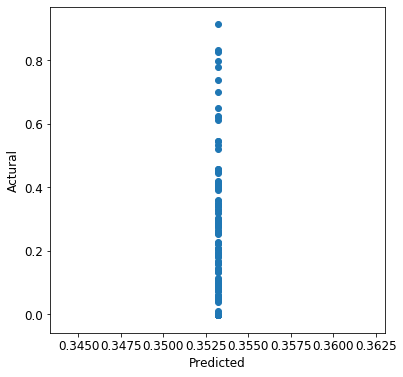

In [91]:
fig,ax=plt.subplots()
ax.scatter(df_cpr_vali['Predicted_CPR'],df_cpr_vali['Actual_CPR'])
ax.set_xlabel("Predicted")
ax.set_ylabel("Actural")
fig.show()

In [92]:
ridge_model_coef_df = pd.DataFrame({'Importance': ridge_model.coef_})
ridge_model_coef_df.reindex(ridge_model_coef_df.Importance.abs().sort_values(ascending=False).index)

,Importance
2,0.094593
22,0.057151
9,-0.044289
0,-0.030538
3,-0.027366
14,0.027349
16,0.027272
10,-0.024192
8,0.023067
7,0.021222


In [1]:
#accuracy(df_cpr_vali['Predicted_CPR'],df_cpr_vali['Actual_CPR'])

# Neural Networks

# #Version 1

In [94]:
# Use a MinMaxScaler to normalize the feature data X_train and X_test 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
import tensorflow as tf
from sklearn import preprocessing

import sklearn.metrics as metrics
import pandas_datareader.data as pdr
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [96]:
nn_model1 = tf.keras.models.Sequential()
nn_model1.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
nn_model1.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
nn_model1.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

from keras import metrics
nn_model1.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

Epoch 1/50
85/85 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 2/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 3/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 4/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 5/50
85/85 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 6/50
85/85 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 7/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss

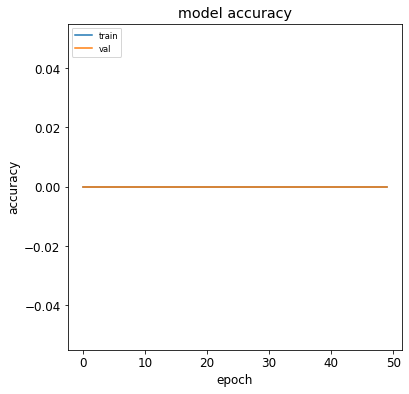

In [97]:
import keras
from matplotlib import pyplot as plt
history = nn_model1.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

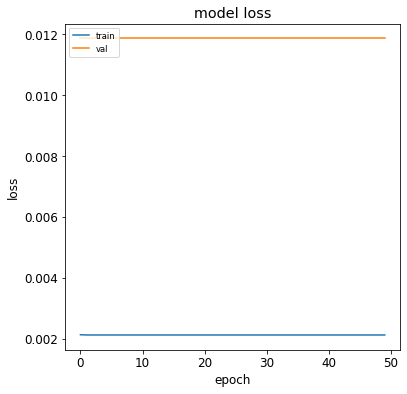

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [99]:
nn_pred1 = nn_model1.predict(x_test)
nn_pred1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [100]:
accuracy(y_test,nn_pred1)

RMSE,MSE,R SQUARE
0.041977,0.001762,-0.774823


# #Version 2

In [199]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [200]:
nn_model2 = Sequential()

nn_model2.add(Dense(units=80,activation='relu'))
nn_model2.add(Dropout(0.5))
nn_model2.add(Dense(units=30,activation='relu'))
nn_model2.add(Dropout(0.5))
nn_model2.add(Dense(units=1,activation='sigmoid'))
nn_model2.compile(loss='binary_crossentropy',optimizer='adam') 

In [201]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [202]:
nn_model2.fit(x=x_train,y=y_train,epochs=200,validation_data=(x_test,y_test)
          ,verbose=1,callbacks=[early_stop],batch_size=256)


Epoch 1/200
2/2 [==============================] - 1s 172ms/step - loss: 0.9313 - val_loss: 0.9928
Epoch 2/200
2/2 [==============================] - 0s 45ms/step - loss: 0.8501 - val_loss: 0.7814
Epoch 3/200
2/2 [==============================] - 0s 68ms/step - loss: 0.7860 - val_loss: 0.6149
Epoch 4/200
2/2 [==============================] - 0s 39ms/step - loss: 0.7120 - val_loss: 0.4877
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 0.6338 - val_loss: 0.3882
Epoch 6/200
2/2 [==============================] - 0s 40ms/step - loss: 0.5844 - val_loss: 0.3067
Epoch 7/200
2/2 [==============================] - 0s 36ms/step - loss: 0.5496 - val_loss: 0.2425
Epoch 8/200
2/2 [==============================] - 0s 50ms/step - loss: 0.4952 - val_loss: 0.1954
Epoch 9/200
2/2 [==============================] - 0s 41ms/step - loss: 0.4618 - val_loss: 0.1627
Epoch 10/200
2/2 [==============================] - 0s 23ms/step - loss: 0.4169 - val_loss: 0.1423
Epoch 11/200
2/2 [

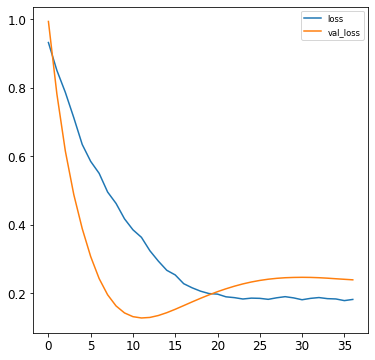

In [203]:
nn_model_loss=pd.DataFrame(nn_model2.history.history)
nn_model_loss.plot()

In [204]:
nn_pred2 = nn_model2.predict(x_test)
nn_pred2 = nn_pred2.flatten()

In [205]:
nn2_model = pd.DataFrame({'Actual SMM': y_test, 'Predicted SMM': nn_pred2})
nn2_model

,Actual SMM,Predicted SMM
CUSIP,,
31418D2H4,0.105447,0.000269
31418D2K7,0.000921,0.000266
31418D2L5,0.006270,0.000241
31418D2M3,0.011856,0.000184
31418D2N1,0.034937,0.000210
...,...,...
31418DZU9,0.004414,0.000284
31418DZV7,0.004996,0.000237
31418DZW5,0.012451,0.000199


In [206]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, nn_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, nn_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, nn_pred2)))

Mean Absolute Error: 0.02759457824637813
Mean Squared Error: 0.0017516980946499
Root Mean Squared Error: 0.04185329251862869


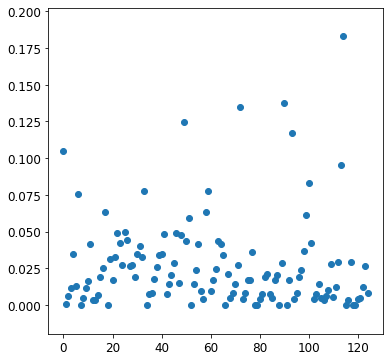

In [207]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(y_test)),(y_test-nn_pred2))
plt.show()

In [208]:
df_cpr_vali2 = pd.DataFrame({'Actual_CPR': y_test, 'Predicted_CPR':nn_pred2 })
df_cpr_vali2['Actual_CPR']=1-(1-df_cpr_vali2['Actual_CPR'])**12
df_cpr_vali2['Predicted_CPR']=1-(1-df_cpr_vali2['Predicted_CPR'])**12

df_cpr_vali2

,Actual_CPR,Predicted_CPR
CUSIP,,
31418D2H4,0.737415,0.003218
31418D2K7,0.010997,0.003182
31418D2L5,0.072704,0.002887
31418D2M3,0.133355,0.002202
31418D2N1,0.347366,0.002519
...,...,...
31418DZU9,0.051704,0.003402
31418DZV7,0.058333,0.002834
31418DZW5,0.139590,0.002382


In [209]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df_cpr_vali2['Actual_CPR'], df_cpr_vali2['Predicted_CPR']))
print('Mean Squared Error:', metrics.mean_squared_error(df_cpr_vali2['Actual_CPR'], df_cpr_vali2['Predicted_CPR']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_cpr_vali2['Actual_CPR'], df_cpr_vali2['Predicted_CPR'])))

Mean Absolute Error: 0.2445307449896116
Mean Squared Error: 0.10370176903335149
Root Mean Squared Error: 0.3220275904846532


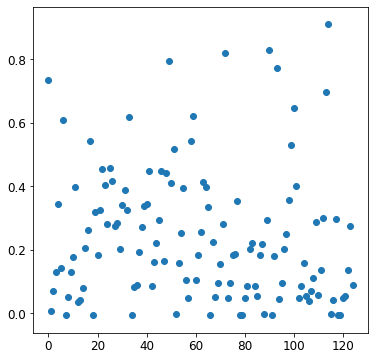

In [210]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(df_cpr_vali2['Actual_CPR'])),(df_cpr_vali2['Actual_CPR']-df_cpr_vali2['Predicted_CPR']))
plt.show()

In [211]:
accuracy(y_test,nn_pred2)

RMSE,MSE,R SQUARE
0.041853,0.001752,-0.764378


# Version 3

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [118]:
# scale train/test data because buiding a neural net
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [119]:
model = Sequential()

#input layer / first hidden layer
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))

# hidden layers
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dropout(0.5))

#output layer
model.add(Dense(1, activation='relu')) # no activation means linear activation a(x)=x
#model.add(Dense(1)) # no activation means linear activation a(x)=x

model.compile(optimizer='adam', loss='mse')
# model.compile(optimizer='rmsprop', loss='mse')

In [120]:
model.fit(x=x_train,
          y=y_train,
          validation_data=(x_test,y_test),
          batch_size=1024,
          epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.0566 - val_loss: 0.0018
Epoch 2/300
1/1 [==============================] - 0s 89ms/step - loss: 0.0096 - val_loss: 0.0018
Epoch 3/300
1/1 [==============================] - 0s 79ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 4/300
1/1 [==============================] - 0s 52ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 5/300
1/1 [==============================] - 0s 68ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 6/300
1/1 [==============================] - 0s 59ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 7/300
1/1 [==============================] - 0s 84ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 8/300
1/1 [==============================] - 0s 56ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 9/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 10/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 11/300
1/1 [===

Epoch 84/300
1/1 [==============================] - 0s 66ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 85/300
1/1 [==============================] - 0s 50ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 86/300
1/1 [==============================] - 0s 62ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 87/300
1/1 [==============================] - 0s 95ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 88/300
1/1 [==============================] - 0s 94ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 89/300
1/1 [==============================] - 0s 80ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 90/300
1/1 [==============================] - 0s 70ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 91/300
1/1 [==============================] - 0s 60ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 92/300
1/1 [==============================] - 0s 56ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 93/300
1/1 [==============================] - 0s 54ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 94/3

1/1 [==============================] - 0s 38ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 167/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 168/300
1/1 [==============================] - 0s 56ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 169/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 170/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 171/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 172/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 173/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 174/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 175/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 176/300


1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 249/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 250/300
1/1 [==============================] - 0s 53ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 251/300
1/1 [==============================] - 0s 34ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 252/300
1/1 [==============================] - 0s 32ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 253/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 254/300
1/1 [==============================] - 0s 53ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 255/300
1/1 [==============================] - 0s 69ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 256/300
1/1 [==============================] - 0s 57ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 257/300
1/1 [==============================] - 0s 58ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 258/300


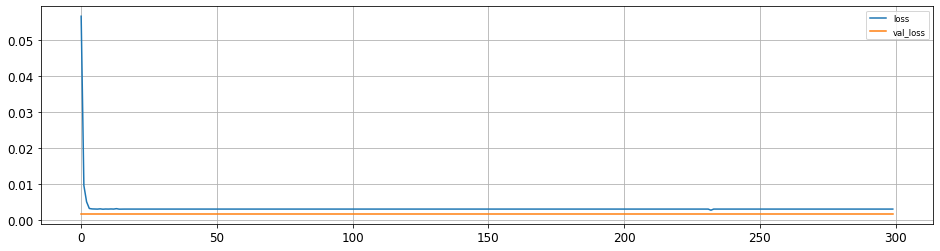

In [121]:
losses = pd.DataFrame(model.history.history)

losses.plot(figsize=(16,4),grid=True)

In [122]:
nn_model3 = Sequential()

#input layer / first hidden layer
nn_model3.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
#model.add(Dropout(0.3))
nn_model3.add(Dropout(0.5))

# hidden layers
nn_model3.add(Dense(256, activation='relu'))
nn_model3.add(Dropout(0.5))

nn_model3.add(Dense(128, activation='relu'))
nn_model3.add(Dropout(0.5))

nn_model3.add(Dense(64, activation='relu'))
nn_model3.add(Dropout(0.3))

#output layer
nn_model3.add(Dense(1, activation='relu')) # no activation means linear activation a(x)=x

nn_model3.compile(optimizer='adam', loss='mse')

In [123]:
nn_model3.fit(x=x_train,
          y=y_train,
          validation_data=(x_test,y_test),
          batch_size=1024,
          epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.0346 - val_loss: 0.0018
Epoch 2/300
1/1 [==============================] - 0s 78ms/step - loss: 0.0071 - val_loss: 0.0018
Epoch 3/300
1/1 [==============================] - 0s 93ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 4/300
1/1 [==============================] - 0s 62ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 5/300
1/1 [==============================] - 0s 85ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 6/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 7/300
1/1 [==============================] - 0s 62ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 8/300
1/1 [==============================] - 0s 101ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 9/300
1/1 [==============================] - 0s 60ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 10/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 11/300
1/1 [==

Epoch 84/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 85/300
1/1 [==============================] - 0s 78ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 86/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 87/300
1/1 [==============================] - 0s 58ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 88/300
1/1 [==============================] - 0s 81ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 89/300
1/1 [==============================] - 0s 59ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 90/300
1/1 [==============================] - 0s 58ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 91/300
1/1 [==============================] - 0s 65ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 92/300
1/1 [==============================] - 0s 40ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 93/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 94/3

1/1 [==============================] - 0s 57ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 167/300
1/1 [==============================] - 0s 51ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 168/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 169/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 170/300
1/1 [==============================] - 0s 43ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 171/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 172/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 173/300
1/1 [==============================] - 0s 46ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 174/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 175/300
1/1 [==============================] - 0s 35ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 176/300


1/1 [==============================] - 0s 43ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 249/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 250/300
1/1 [==============================] - 0s 37ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 251/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 252/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 253/300
1/1 [==============================] - 0s 41ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 254/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 255/300
1/1 [==============================] - 0s 42ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 256/300
1/1 [==============================] - 0s 55ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 257/300
1/1 [==============================] - 0s 52ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 258/300


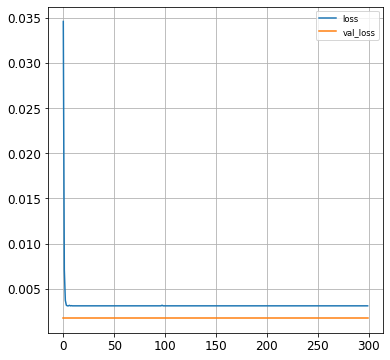

In [124]:
losses3 = pd.DataFrame(nn_model3.history.history)

losses3.plot(figsize=(6,6),grid=True)

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

test_predictions = nn_model3.predict(x_test)
print(f'(test set) mean absolute error       = {np.round(mean_absolute_error(y_test,test_predictions),4)}')
print(f'(test set) mean sq root sq error     = {np.round(np.sqrt(mean_squared_error(y_test,test_predictions)),4)}')
print(f'(test set) explained variance score  = {np.round(explained_variance_score(y_test,test_predictions),4)}')
print('\n')
train_predictions = nn_model3.predict(x_train)
print(f'(train set) mean absolute error      = {np.round(mean_absolute_error(y_train,train_predictions),4)}')
print(f'(train set) mean sq root sq error    = {np.round(np.sqrt(mean_squared_error(y_train,train_predictions)),4)}')
print(f'(train set) explained variance score = {np.round(explained_variance_score(y_train,train_predictions),4)}')

(test set) mean absolute error       = 0.0278
(test set) mean sq root sq error     = 0.042
(test set) explained variance score  = 0.0


(train set) mean absolute error      = 0.0357
(train set) mean sq root sq error    = 0.0557
(train set) explained variance score = 0.0


In [126]:
nn_pred = nn_model3.predict(x_test)
nn_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [127]:
accuracy(y_test,nn_pred)

RMSE,MSE,R SQUARE
0.041977,0.001762,-0.774823


# Gradient Decent

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# parameter grid for xgb model
param_dict = {
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
xgb_model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", xgb_model.best_score)
print("Model's best iteration: ", xgb_model.best_iteration+1)

[11:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.427288
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.385911
[2]	Test-rmse:0.348682
[3]	Test-rmse:0.315393
[4]	Test-rmse:0.285443
[5]	Test-rmse:0.258425
[6]	Test-rmse:0.233953
[7]	Test-rmse:0.212276
[8]	Test-rmse:0.192859
[9]	Test-rmse:0.175522
[10]	Test-rmse:0.159703
[11]	Test-rmse:0.145338
[12]	Test-rmse:0.132972
[13]	Test-rmse:0.121775
[14]	Test-rmse:0.111843
[15]	Test-rmse:0.10284
[16]	Test-rmse:0.095107
[17]	Test-rmse:0.088489
[18]	Test-rmse:0.082673
[19]	Test-rmse:0.077726
[20]	Test-rmse:0.0735
[21]	Test-rmse:0.069542
[22]	Test-rmse:0.066117
[23]	Test-rmse:0.063296
[24]	Test-rmse:0.060851
[25]	Test-rmse:0.058653
[26]	Test-rmse:0.056866
[27]	Test-rmse:0.055351
[28]	Test-rmse:0.053895
[29]	Test-rmse:0.052678
[30]	Test-rmse:0.051517
[31]	Test-rmse:0.050714
[32]	Test-rmse:0.05004
[33]	Test-rmse:0.049419
[34]	Test-rmse

In [ ]:
# convert training data to DMatrix object
dpred=xgb.DMatrix(x_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(xgb_model.predict(dpred), y_train)))

# predict RMSE of model on test data
GBDT_test_pred = xgb_model.predict(xgb.DMatrix(x_test))


RMSE of XGB model on training data:  0.006133890849583887


In [ ]:
GBDT_test_pred

array([0.14184266, 0.00522935, 0.01218528, 0.01625487, 0.02283627,
       0.05699968, 0.04116976, 0.00341225, 0.01442879, 0.01567873,
       0.02519333, 0.07151076, 0.00398085, 0.00964475, 0.01503465,
       0.03544757, 0.05565909, 0.10544199, 0.03798014, 0.047932  ,
       0.03228876, 0.04132703, 0.05828387, 0.05526906, 0.0402084 ,
       0.05430496, 0.04753581, 0.03498968, 0.06867227, 0.0334796 ,
       0.03591627, 0.0536752 , 0.05528384, 0.04732504, 0.0263817 ,
       0.01518711, 0.01514351, 0.02614748, 0.04036602, 0.0474149 ,
       0.05527568, 0.06186926, 0.01409984, 0.02157074, 0.03971499,
       0.03965813, 0.04775161, 0.0231005 , 0.04926085, 0.02940497,
       0.06344923, 0.07332471, 0.0141646 , 0.02228346, 0.03896579,
       0.0544762 , 0.01220903, 0.00701603, 0.04632708, 0.06208488,
       0.01306278, 0.0260776 , 0.03457105, 0.05683753, 0.00556582,
       0.07194367, 0.07065269, 0.03519216, 0.00784934, 0.01353922,
       0.01952428, 0.04002208, 0.03291851, 0.00718433, 0.01270

In [ ]:
GBDT_test_pred = GBDT_test_pred.flatten()

In [ ]:
df_model = pd.DataFrame({'Actual SMM': y_test, 'Predicted SMM': GBDT_test_pred})
df_model

,Actual SMM,Predicted SMM
CUSIP,,
31418D2H4,0.105447,0.141843
31418D2K7,0.000921,0.005229
31418D2L5,0.006270,0.012185
31418D2M3,0.011856,0.016255
31418D2N1,0.034937,0.022836
...,...,...
31418DZU9,0.004414,0.004720
31418DZV7,0.004996,0.008834
31418DZW5,0.012451,0.016574


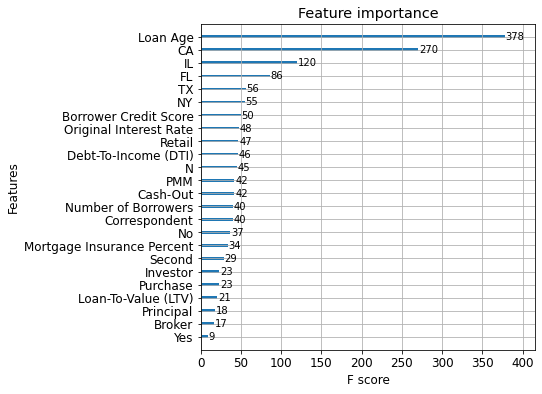

In [ ]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(xgb_model))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, GBDT_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, GBDT_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, GBDT_test_pred)))

Mean Absolute Error: 0.0223211566211291
Mean Squared Error: 0.002199542118955521
Root Mean Squared Error: 0.04689927631590408


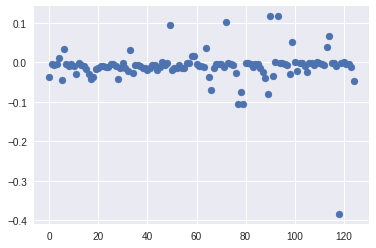

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(y_test)),(y_test-GBDT_test_pred))
plt.show()

In [50]:
df_cpr_vali = pd.DataFrame({'Actual_CPR': y_test, 'Predicted_CPR':GBDT_test_pred })
df_cpr_vali['Actual_CPR']=1-(1-df_cpr_vali['Actual_CPR'])**12
df_cpr_vali['Predicted_CPR']=1-(1-df_cpr_vali['Predicted_CPR'])**12

df_cpr_vali

,Actual_CPR,Predicted_CPR
CUSIP,,
31418D2H4,0.737415,0.840484
31418D2K7,0.010997,0.060978
31418D2L5,0.072704,0.136811
31418D2M3,0.133355,0.178531
31418D2N1,0.347366,0.242107
...,...,...
31418DZU9,0.051704,0.055188
31418DZV7,0.058333,0.101002
31418DZW5,0.139590,0.181722


In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR']))
print('Mean Squared Error:', metrics.mean_squared_error(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR'])))

Mean Absolute Error: 0.14556282659389638
Mean Squared Error: 0.051304059932744714
Root Mean Squared Error: 0.22650399540128363


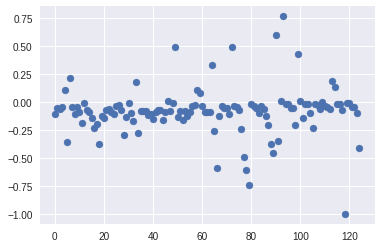

In [52]:
from matplotlib import pyplot as plt

plt.rcParams['agg.path.chunksize'] = 20000
plt.scatter(range(len(df_cpr_vali['Actual_CPR'])),(df_cpr_vali['Actual_CPR']-df_cpr_vali['Predicted_CPR']))
plt.show()

In [59]:
accuracy(df_cpr_vali['Actual_CPR'], df_cpr_vali['Predicted_CPR'])

RMSE,MSE,R SQUARE
0.226504,0.051304,-0.161282
